In [1]:
import pymc as pm
import arviz as az

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_format = "svg"
sns.set_theme()

In [2]:
# keys: 112 major, 36 minor. The order doesn't matter
keys = np.zeros(148)
keys[:112] = 1
keys

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
with pm.Model() as model:
    theta = pm.Uniform("theta", 0, 1)
    pm.Bernoulli("keys", p=theta, observed=keys)

In [4]:
with model:
    idata = pm.sample(5000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: title={'center': 'theta'}>

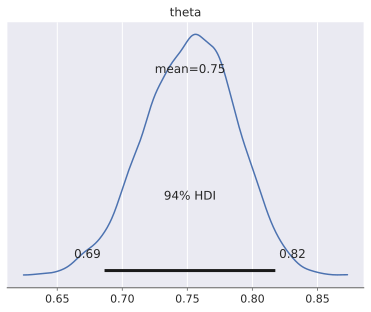

In [5]:
az.plot_posterior(idata)

In [6]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [7]:
idata.posterior["theta"].to_numpy()

array([[0.76617178, 0.67396034, 0.83024349, ..., 0.73832065, 0.70125765,
        0.74850584],
       [0.68122449, 0.73152183, 0.73152183, ..., 0.66866361, 0.7252007 ,
        0.75331306]])

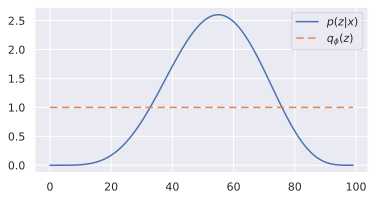

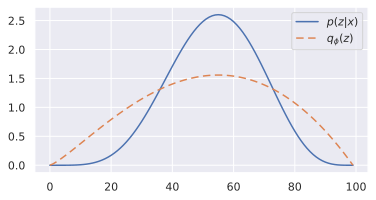

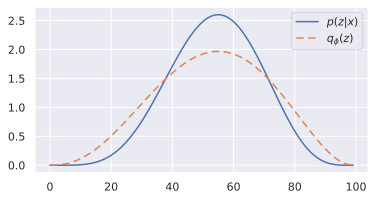

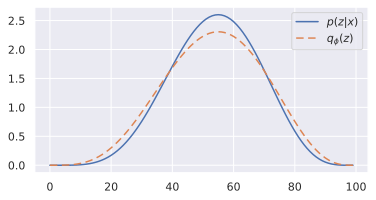

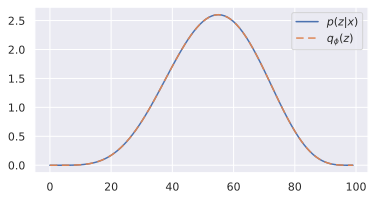

In [8]:
n_steps = 5
#cmap = sns.color_palette("flare", as_cmap=True).resampled(n_steps)
for i, (a, b) in enumerate(zip(np.linspace(1,6,n_steps), np.linspace(1,5,n_steps))):
    fig, ax = plt.subplots(figsize=(6,3))
    sns.lineplot(stats.beta(6, 5).pdf(np.linspace(0,1,100)), ax=ax, label="$p(z|x)$")
    sns.lineplot(stats.beta(a, b).pdf(np.linspace(0,1,100)), ax=ax, dashes=[5,3], label="$q_ϕ(z)$")
    fig.savefig(f"presentation/img/vi_step{i+1}.svg")

In [9]:
data_group1 = np.array([
    [1, 1, 1], # pattern 1: *rrr
    [0, 0, 0], # pattern 2: *nnn
    [1, 0, 1], # pattern 3: *rnr
])
data_group1

array([[1, 1, 1],
       [0, 0, 0],
       [1, 0, 1]])

In [10]:
coords = {
    "pattern": range(3),
    "beat": ["beat2", "beat3", "beat4"]
}

with pm.Model(coords=coords) as regularity_model_coords:
    # sample the regularity from its prior.
    regularity = pm.Beta("regularity", 0.5, 0.5)
    # sample each beat in each pattern
    pm.Bernoulli("repeat", regularity,
                 dims=("pattern", "beat"),
                 observed=data_group1
                )

    idata_reg = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [regularity]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


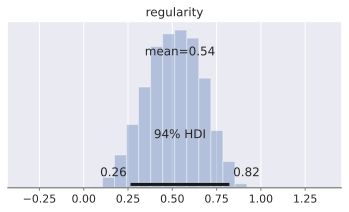

In [19]:
fig, ax = plt.subplots(figsize=(6,3))
az.plot_posterior(idata_reg, ax=ax, kind="hist")
fig.savefig("presentation/img/sample_hist.svg")

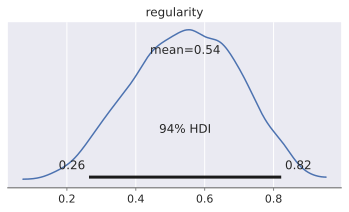

In [20]:
fig, ax = plt.subplots(figsize=(6,3))
az.plot_posterior(idata_reg, ax=ax)
fig.savefig("presentation/img/sample.svg")